<a href="https://colab.research.google.com/github/Afix0/ZAPOCET_SU1/blob/main/mushroom_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mushroom species clustering**

This project explores the application of hierarchical clustering methods to analyze and group sentences based on their semantic similarity. The project demonstrates the use of unsupervised learning for organizing and visualizing textual information without pre-defined labels.

In [27]:
import numpy as np
import gensim
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from google.colab import drive
import SU1_zapocet_functions as functions
from collections import Counter
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo



In [28]:
mushroom = fetch_ucirepo(id=73)
mushroom_df = pd.DataFrame(data=mushroom.data.features)
mushroom_df.head()

cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-surface-below-ring  \
0         n          k           e  ...                        s   
1         b          k           e  ...                        s   
2         b          n           e  ...                        s   
3         n          n           e  ...                        s   
4         b          k           t  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 22 columns]

In [29]:
mushroom_df = functions.preprocess_mushroom_data(mushroom_df).astype(str)

for column in mushroom_df.columns:
    split_columns = column.split("-")
    jointed_columns = ' '.join(split_columns)
    mushroom_df[column] = mushroom_df[column].apply(lambda x: f"{jointed_columns} is {x}")

mushroom_df.head()

cap-shape            cap-surface            cap-color  \
0  cap shape is convex  cap surface is smooth   cap color is brown   
1  cap shape is convex  cap surface is smooth  cap color is yellow   
2    cap shape is bell  cap surface is smooth   cap color is white   
3  cap shape is convex   cap surface is scaly   cap color is white   
4  cap shape is convex  cap surface is smooth    cap color is gray   

                 bruises             odor          gill-attachment  \
0     bruises is bruises  odor is pungent  gill attachment is free   
1     bruises is bruises   odor is almond  gill attachment is free   
2     bruises is bruises    odor is anise  gill attachment is free   
3     bruises is bruises  odor is pungent  gill attachment is free   
4  bruises is no bruises     odor is none  gill attachment is free   

              gill-spacing            gill-size           gill-color  \
0    gill spacing is close  gill size is narrow  gill color is black   
1    gill spacing is close   gill size is broad  gill color is black   
2    gill spacing is close   gill size is broad  gill color is brown   
3    gill spacing is close  gill size is narrow  gill color is brown   
4  gill spacing is crowded   gill size is broad  gill color is black   

                stalk-shape  ...            stalk-surface-below-ring  \
0  stalk shape is enlarging  ...  stalk surface below ring is smooth   
1  stalk shape is enlarging  ...  stalk surface below ring is smooth   
2  stalk shape is enlarging  ...  stalk surface below ring is smooth   
3  stalk shape is enlarging  ...  stalk surface below ring is smooth   
4   stalk shape is tapering  ...  stalk surface below ring is smooth   

            stalk-color-above-ring           stalk-color-below-ring  \
0  stalk color above ring is white  stalk color below ring is white   
1  stalk color above ring is white  stalk color below ring is white   
2  stalk color above ring is white  stalk color below ring is white   
3  stalk color above ring is white  stalk color below ring is white   
4  stalk color above ring is white  stalk color below ring is white   

              veil-type           veil-color         ring-number  \
0  veil type is partial  veil color is white  ring number is one   
1  veil type is partial  veil color is white  ring number is one   
2  veil type is partial  veil color is white  ring number is one   
3  veil type is partial  veil color is white  ring number is one   
4  veil type is partial  veil color is white  ring number is one   

                 ring-type           spore-print-color  \
0     ring type is pendant  spore print color is black   
1     ring type is pendant  spore print color is brown   
2     ring type is pendant  spore print color is brown   
3     ring type is pendant  spore print color is black   
4  ring type is evanescent  spore print color is brown   

                population             habitat  
0  population is scattered    habitat is urban  
1   population is numerous  habitat is grasses  
2   population is numerous  habitat is meadows  
3  population is scattered    habitat is urban  
4   population is abundant  habitat is grasses  

[5 rows x 22 columns]

In [30]:
sentences = []
for i in range(len(mushroom_df)):
    sentence = []
    for word in mushroom_df.iloc[i]:
        sentence.append(word)
    sentences.append(sentence)

print(sentences)

[['cap shape is convex', 'cap surface is smooth', 'cap color is brown', 'bruises is bruises', 'odor is pungent', 'gill attachment is free', 'gill spacing is close', 'gill size is narrow', 'gill color is black', 'stalk shape is enlarging', 'stalk root is equal', 'stalk surface above ring is smooth', 'stalk surface below ring is smooth', 'stalk color above ring is white', 'stalk color below ring is white', 'veil type is partial', 'veil color is white', 'ring number is one', 'ring type is pendant', 'spore print color is black', 'population is scattered', 'habitat is urban'], ['cap shape is convex', 'cap surface is smooth', 'cap color is yellow', 'bruises is bruises', 'odor is almond', 'gill attachment is free', 'gill spacing is close', 'gill size is broad', 'gill color is black', 'stalk shape is enlarging', 'stalk root is club', 'stalk surface above ring is smooth', 'stalk surface below ring is smooth', 'stalk color above ring is white', 'stalk color below ring is white', 'veil type is pa

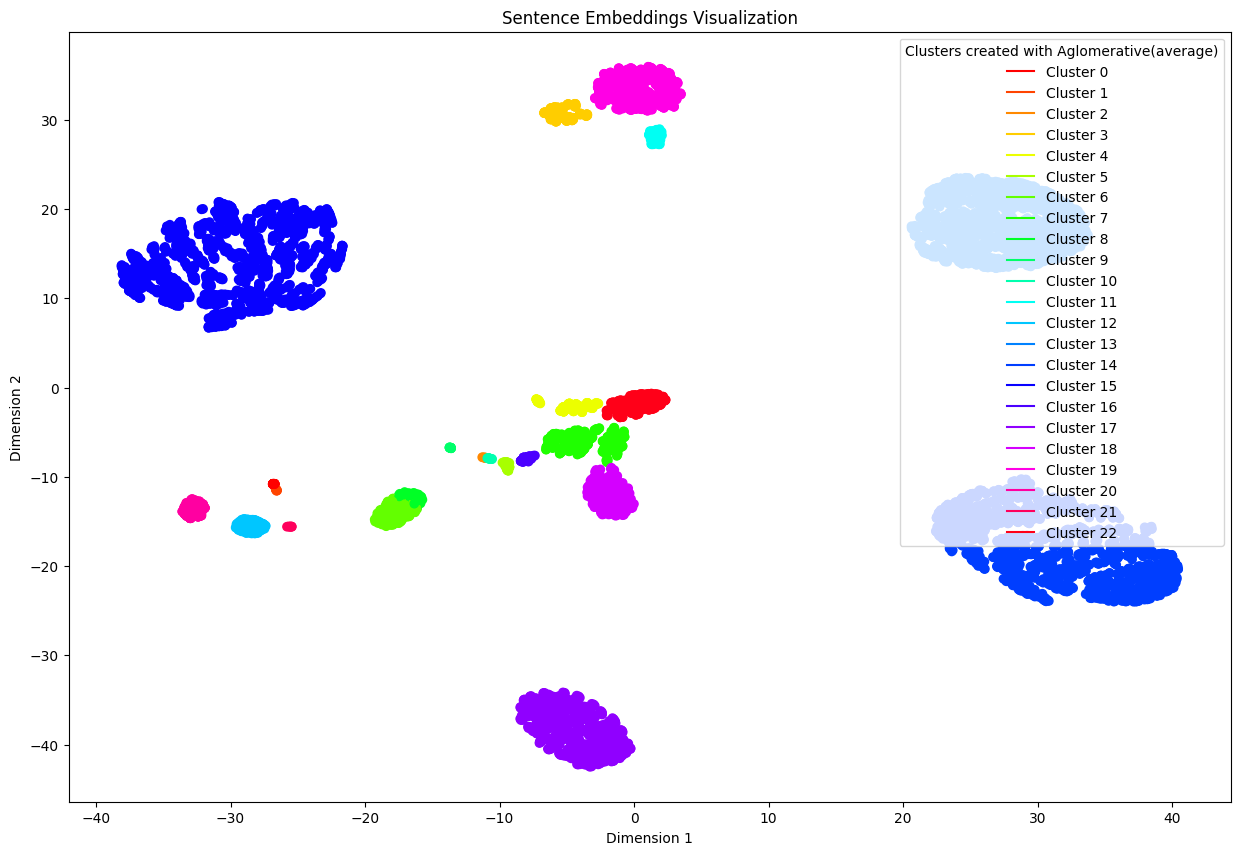

In [31]:
#Aglomerative clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity

model = Word2Vec(sentences, min_count=1, vector_size=20, window=5)
embeddings = np.array([functions.sentence_embedding(sentence, model) for sentence in sentences])

labels_aglomerative_average = AgglomerativeClustering(n_clusters= 23, metric = 'cosine', linkage='average').fit_predict(embeddings)
functions.plot_sentence_embeddings(embeddings, labels_aglomerative_average, clustering_method = "Aglomerative(average)")

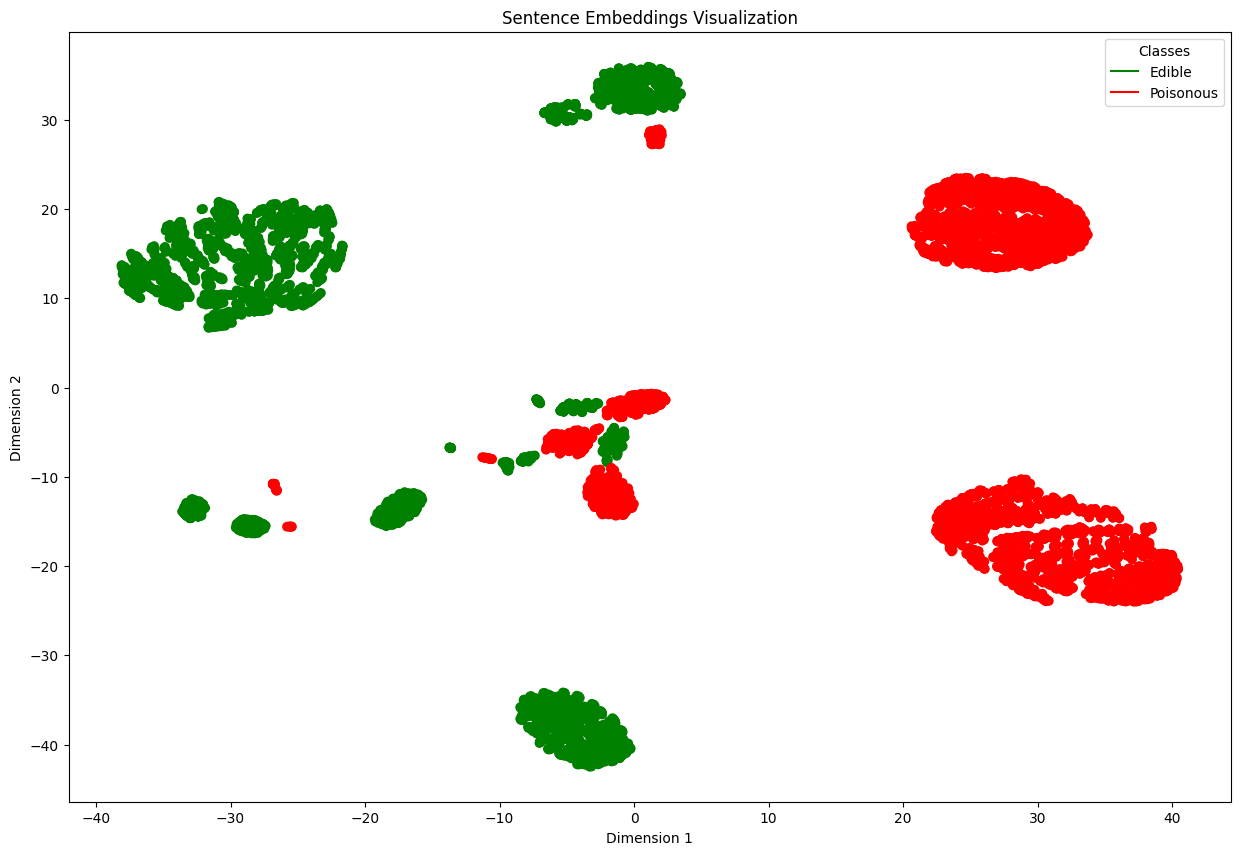

In [32]:
mapping_targets = {'p': 'poisonous', 'e': 'edible'}

targets_df = pd.DataFrame(data=mushroom.data.targets)
targets_df.columns = ['class']
targets_df['class'] = targets_df['class'].map(mapping_targets)
targets_df.head()
functions.plot_sentence_embeddings(embeddings, target_labels=np.array(targets_df['class']))

In [33]:
functions.count_mixed_clusters(labels_aglomerative_average, np.array(targets_df['class']), 'Aglomerative(average)')

Indexes of clusters made by Aglomerative(average) labeled as edible: [19, 17, 4, 3, 15, 12, 16, 5, 20, 6, 8, 9]
Indexes of clusters made by Aglomerative(average) labeled as poisonous: [22, 13, 18, 14, 11, 10, 21, 2, 0, 1]
Indexes of clusters made by Aglomerative(average) labeled as mixed:  [7]
